In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df = pd.read_csv (r'Resources/weather_covid.csv')
#print(df.columns)
##PK: dropped index
df.drop(['index','county_fips_y','state_id_y','state_name_y','lat_y','lng_y','population_y','state','fips', 'county_y'],inplace=True,axis=1)
renamed = df.rename(columns={'temperature (degC)':'temperature',
                             'wind_speed (m/s)':'wind_speed',
                             'surface_solar_radiation (W/m^2)':'surface_solar_radiation',
                             'total_cloud_cover (0-1)':'total_cloud_cover',
                             'total_precipitation (mm of water equivalent)':'total_precipitation',
                             'relative_humidity (0-1)':'relative_humidity','state_name_x':'state_name',
                             'county_x':'county',
                             'state_name_x': 'state',
                             'county_fips_x':'fips',
                             'state_id_x':'state_id',
                             'population_x':'population',
                             'lat_x':'lat',
                             'lng_x':'lng',
                             'Cases per 100k':'cases_per_100k',
                             'Deaths per 100k':'deaths_per_100k'})

#print(renamed.columns)
weather_df = renamed

##PK: changed #Celsius to Fahrenheit Formula: (°C * 1.8) + 32 = °F
weather_df['temperature']= (weather_df['temperature'] * 1.8) + 32 


In [4]:
#I narrowed down the list to only columns that I used. Add to list as needed or just pull from the weather_df.
#narrow_weather = weather_df[['index','temperature','county', 'deaths_per_100k','cases_per_100k','surface_solar_radiation']]


weather_df.columns



Index(['date', 'temperature', 'wind_speed', 'surface_solar_radiation',
       'total_cloud_cover', 'total_precipitation', 'relative_humidity',
       'county', 'state', 'fips', 'state_id', 'population', 'lat', 'lng',
       'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k'],
      dtype='object')

In [5]:
##PK: Add columns for new cases per day
weather_df["new_cases_per_100k"]=""
weather_df["new_deaths_per_100k"]=""

curr_cases = 0
prior_day_cases = 0
curr_deaths = 0
prior_day_deaths = 0
curr_county=""
prior_county=""

for index, row in weather_df.iterrows():
    curr_county= row["county"]
    curr_cases = row["cases_per_100k"]
    curr_deaths = row["deaths_per_100k"]
    
    if curr_county == prior_county:
        new_cases = (curr_cases - prior_day_cases)
        new_deaths = (curr_deaths - prior_day_deaths)
    
    else:
        new_cases = curr_cases
        new_deaths= (curr_deaths) 
        
    weather_df.loc[index,"new_cases_per_100k"]= new_cases
    weather_df.loc[index,"new_deaths_per_100k"]= new_deaths
    
    prior_county = curr_county
    prior_day_cases = curr_cases
    prior_day_deaths = curr_deaths
    


In [6]:
##PK: Dropped erroneous outliers

weather_df.drop(weather_df[weather_df['new_deaths_per_100k']<-0.001].index, inplace=True)
weather_df.drop(weather_df[weather_df['new_cases_per_100k']<-0.001].index, inplace=True)

len(weather_df)

19704

Wow look. It's like I thought. The hotter it gets... the less deaths. For many reasons like sun exposure, time spent outside, and other factors that lead many diseases to become more deadly during the winter. Almost no deaths happen above 30 degrees celcius. The largest concentration of 500+ is in the -10 to +10 range

Ok so I was thinking about making these a rainbow using some kind of for loop with the color and positional setting. Kind of like a heatmap? That would be cool. It's too hard to decipher with just the blue


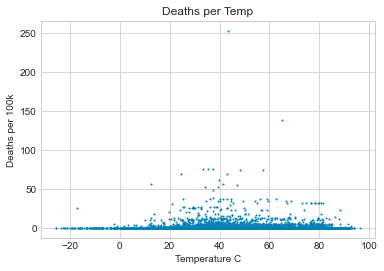

This Graph shows even more clearly that temperature has a negative correlation to transmission rate of covid-19 in the USA.


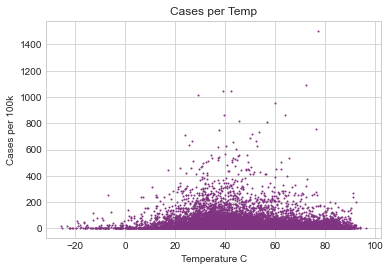

In [8]:
plt.scatter(weather_df['temperature'],weather_df['new_deaths_per_100k'],s=1,color=(0, 0.5, .7))
plt.title("Deaths per Temp")
plt.xlabel("Temperature C")
plt.ylabel("Deaths per 100k")
print("Wow look. It's like I thought. The hotter it gets... the less deaths. For many reasons like sun exposure, time spent outside, and other factors that lead many diseases to become more deadly during the winter. Almost no deaths happen above 30 degrees celcius. The largest concentration of 500+ is in the -10 to +10 range")
print("\nOk so I was thinking about making these a rainbow using some kind of for loop with the color and positional setting. Kind of like a heatmap? That would be cool. It's too hard to decipher with just the blue" )

plt.show()

plt.scatter(weather_df['temperature'],weather_df['new_cases_per_100k'],s=1,color=(0.5, 0.2, 0.5))
plt.title("Cases per Temp")
plt.xlabel("Temperature C")
plt.ylabel("Cases per 100k")
print("""This Graph shows even more clearly that temperature has a negative correlation to transmission rate of covid-19 in the USA.""")
plt.show()

Wow isn't surface solar radiation beautiful?? 

It as well shows that the more sun you get.... the less covid you get! 

Fascinating!


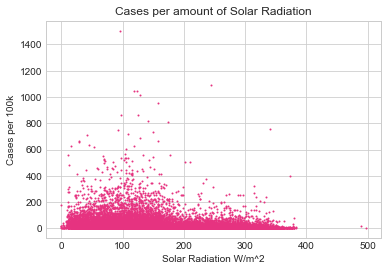

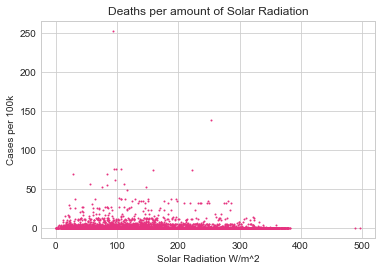

In [13]:
plt.scatter(weather_df['surface_solar_radiation'],weather_df['new_cases_per_100k'],s=1,c=[(0.9, 0.2, 0.5)])
plt.title("Cases per amount of Solar Radiation")
plt.xlabel("Solar Radiation W/m^2")
plt.ylabel("Cases per 100k")
print("""Wow isn't surface solar radiation beautiful?? 

It as well shows that the more sun you get.... the less covid you get! 

Fascinating!""")
plt.show()

plt.scatter(weather_df['surface_solar_radiation'],weather_df['new_deaths_per_100k'],s=1,c=[(0.9, 0.2, 0.5)])
plt.title("Deaths per amount of Solar Radiation")
plt.xlabel("Solar Radiation W/m^2")
plt.ylabel("Cases per 100k")
print("""""")
plt.show()

In [195]:
#maybe sort by population and see if temperature/solar radiation have a simulaer effect 
# depending on population bucket 

Hmmm I don't know what the graph means yet but I like it. 
It mainly shows that cloud cover has little to do wish surface solar radiation. 
There are a lot of observations both at 0 and 1 with a nice distribution in between :)
I kind of want this one on my wall



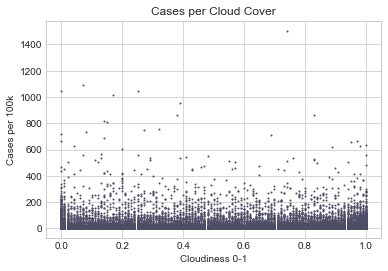

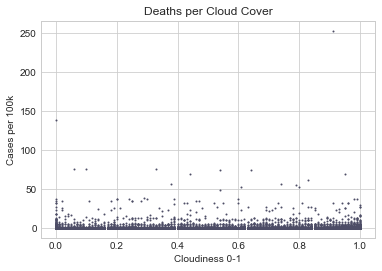

In [14]:
plt.scatter(weather_df['total_cloud_cover'],weather_df['new_cases_per_100k'],s=1,color=[.3, 0.3, 0.4])
plt.title("Cases per Cloud Cover")
plt.xlabel("Cloudiness 0-1")
plt.ylabel("Cases per 100k")
print("""Hmmm I don't know what the graph means yet but I like it. 
It mainly shows that cloud cover has little to do wish surface solar radiation. 
There are a lot of observations both at 0 and 1 with a nice distribution in between :)
I kind of want this one on my wall
""")
plt.show()


plt.scatter(weather_df['total_cloud_cover'],weather_df['new_deaths_per_100k'],s=1,color=[.3, 0.3, 0.4])
plt.title("Deaths per Cloud Cover")
plt.xlabel("Cloudiness 0-1")
plt.ylabel("Cases per 100k")
print("""
""")
plt.show()

Wind speed! I'm not exactly sure what it means but higher winds


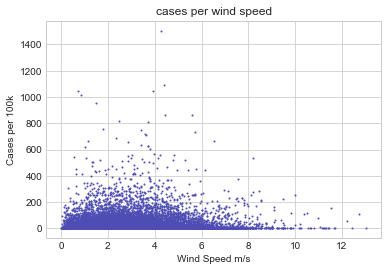

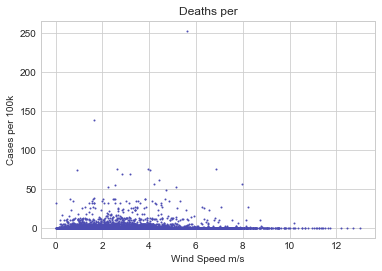

In [10]:
plt.scatter(weather_df['wind_speed'],weather_df['new_cases_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("cases per wind speed")
plt.xlabel("Wind Speed m/s")
plt.ylabel("Cases per 100k")
print("""Wind speed! I'm not exactly sure what it means but higher winds""")
plt.show()

plt.scatter(weather_df['wind_speed'],weather_df['new_deaths_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("Deaths per")
plt.xlabel("Wind Speed m/s")
plt.ylabel("Cases per 100k")
print("""""")
plt.show()

Wow! a very nice waterfall! ok lets see about infection rate


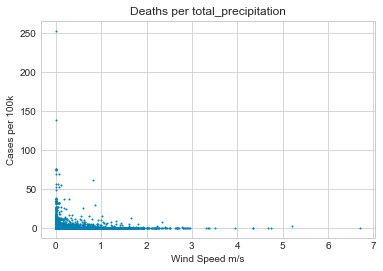

Ok this one is on cases per 100k


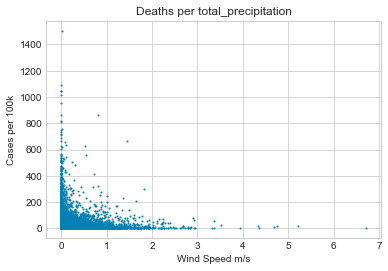

In [15]:
prec_death = plt.scatter(weather_df['total_precipitation'],
            weather_df['new_deaths_per_100k'],s=1,color=(0, 0.5, .7))
plt.title("Deaths per total_precipitation")
plt.xlabel("Wind Speed m/s")
plt.ylabel("Cases per 100k")
print("""Wow! a very nice waterfall! ok lets see about infection rate""")
plt.show()
prec_infect = plt.scatter(weather_df['total_precipitation'],
            weather_df['new_cases_per_100k'],s=1,color=(0, 0.5, .7))
plt.title("Deaths per total_precipitation")
plt.xlabel("Wind Speed m/s")
plt.ylabel("Cases per 100k")
print("""Ok this one is on cases per 100k""")

wow! low humidity correlates with low case numbers! and deaths too!


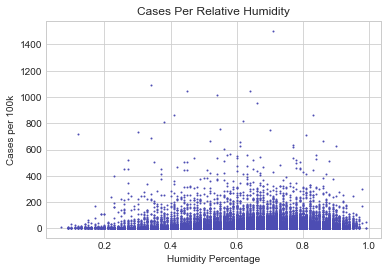

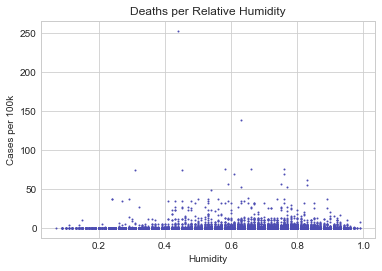

In [16]:
plt.scatter(weather_df['relative_humidity'],weather_df['new_cases_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("Cases Per Relative Humidity")
plt.xlabel("Humidity Percentage")
plt.ylabel("Cases per 100k")
print("""wow! low humidity correlates with low case numbers! and deaths too!""")
plt.show()

plt.scatter(weather_df['relative_humidity'],weather_df['new_deaths_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("Deaths per Relative Humidity")
plt.xlabel("Humidity")
plt.ylabel("Cases per 100k")
print("""""")
plt.show()

Doint cases and deaths by lat proves that lat/lng is irrelevant. 
It's the weather that matters 


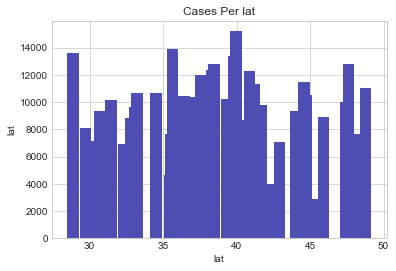

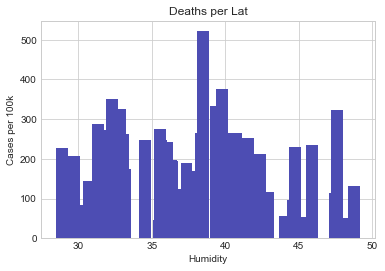

In [200]:
#this one takes a second... like 30 seconds
plt.bar(weather_df['lat'],weather_df['cases_per_100k'],color=[.3, 0.3, 0.7])
plt.title("Cases Per lat")
plt.xlabel("lat")
plt.ylabel("lat")
print("""Doint cases and deaths by lat proves that lat/lng is irrelevant. 
It's the weather that matters """)
plt.show()

plt.bar(weather_df['lat'],weather_df['deaths_per_100k'],color=[.3, 0.3, 0.7])
plt.title("Deaths per Lat")
plt.xlabel("Humidity")
plt.ylabel("Cases per 100k")
print("""""")
plt.show()

population of the county had little to no effect on transmission rates or death. In fact living in a very low population county actually seems to give a higher chance of getting covid. 
Maybe population density would show more of a correlation.


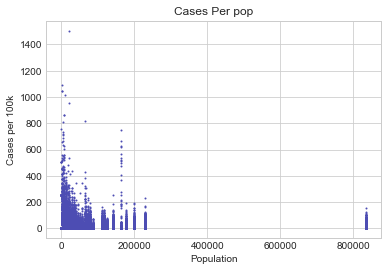

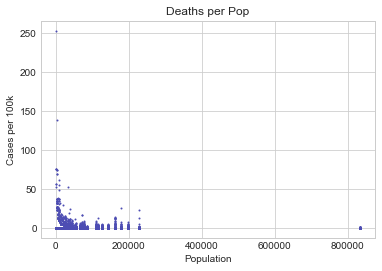

In [12]:
#this one takes a second... like 30 seconds
plt.scatter(weather_df['population'],weather_df['new_cases_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("Cases Per pop")
plt.xlabel("Population")
plt.ylabel("Cases per 100k")
print("""population of the county had little to no effect on transmission rates or death. In fact living in a very low population county actually seems to give a higher chance of getting covid. 
Maybe population density would show more of a correlation.""")
plt.show()

plt.scatter(weather_df['population'],weather_df['new_deaths_per_100k'],s=1,color=[.3, 0.3, 0.7])
plt.title("Deaths per Pop")
plt.xlabel("Population")
plt.ylabel("Cases per 100k")
print("""""")
plt.show()